## Group3 - Replication_1
#### Members
1. Andrea Ulloa (20172597)
2. Ana Angulo (20171627)
3. Angela Coapaza (20171636) 



### An Inferencial Problem: The College-Educated Wage Gap
Using the data from the March Supplement of the U.S. Current Population Survey (2015) , in  this lab, we are going to focus in  payments of the college-educated workers and answer the following inference question:

What is the difference in predicted wages between workers with some college education (scl) versus college graduate workers(clg)?

To investigate the College-Educated Wage Gap, we consider the following log-linear regression model:

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 SCL  + \beta_2 CLG + \beta_3'W  + \epsilon,
\end{align}

Where  SCL is the indicator of workers with some college education( 1  if yes 0  otherwise), CLG is the indicator of college graduate workers (1  if yes 0  otherwise) and the  𝑊 's are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of workers with some college education and college graduate workers. 


# Data

We consider the same subsample of the U.S. Current Population Survey (2015). Let us load the data set.

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [1]:
pip install pyreadr 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import relevant packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Extracting the data
total_data  = pd.read_csv(r'../../data/wage2015_subsample_inference.csv')
total_data['occ']=pd.Categorical(total_data.occ)
total_data['occ2']=pd.Categorical(total_data.occ2)
total_data['ind']=pd.Categorical(total_data.ind)
total_data['ind2']=pd.Categorical(total_data.ind2)

#Determining the dimension of our data set.
total_data.shape
# There are 5150 obs and 21 features

(5150, 21)

Focus on the subset of college-educated workers (scl, clg variables). Thus, we will filter the observations that are at least one year old or have finished college.

In [4]:
print(total_data['shs'].value_counts()) 
print(total_data['hsg'].value_counts()) 
# In our new base we should have 3068 observations

0.0    5030
1.0     120
Name: shs, dtype: int64
0.0    3894
1.0    1256
Name: hsg, dtype: int64


In [16]:
data = total_data[(total_data['shs'] == 1) | (total_data['hsg'] == 1)]
data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
6,43,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,42.0,17.64,74.088,311.1696,5120.0,17,7280.0,14
7,44,19.230769,2.956512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9
8,47,12.000000,2.484907,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,4040.0,13,8590.0,19
10,73,17.307692,2.851151,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,4020.0,13,8270.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,12.980769,2.563469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15.0,2.25,3.375,5.0625,2010.0,6,9370.0,22
5137,32590,13.461538,2.599837,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.0,0.64,0.512,0.4096,4720.0,16,8590.0,19
5141,32599,22.596154,3.117780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,15.0,2.25,3.375,5.0625,9620.0,22,5390.0,9
5142,32603,16.826923,2.822980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,7150.0,20,8770.0,21


### Describing the main variables 

Let's go to **describe the main variables** that we will use later to obtain the causal effect of sex on income: 

wage, log-wage, sex, some college, college graduate, avdanced degree, experience

In [43]:
data.describe()
#"lwage","sex","scl","clg","ne","mw","so","we","exp1" - to regression
#"wage, lwage","sex","scl","clg","ne","mw","so","we","exp1" - to describe

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
count,3068.000000,3068.000000,3068.000000,3068.000000,3068.0,3068.0,3068.000000,3068.000000,3068.0,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000
mean,15716.577249,23.657384,3.000022,0.470991,0.0,0.0,0.466754,0.533246,0.0,0.265971,0.285854,0.221643,0.226532,12.700945,2.676344,7.133814,21.345586
std,9752.832944,19.367700,0.544510,0.499239,0.0,0.0,0.498975,0.498975,0.0,0.441921,0.451894,0.415420,0.418655,10.312857,3.766616,13.285832,47.858967
min,10.000000,3.021978,1.105912,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.001000,0.000100
25%,7262.000000,14.170040,2.651130,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.500000,0.202500,0.091125,0.041006
50%,15089.500000,19.230769,2.956512,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,0.810000,0.729000,0.656100
75%,24595.500000,27.990239,3.331855,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,19.000000,3.610000,6.859000,13.032100
max,32624.000000,490.196078,6.194805,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,42.500000,18.062500,76.765625,326.253906


In [45]:
#Creando una variable string para los graficos
data['sexo']="female"
data.loc[data[ 'sex' ] == 0,'sexo'] = "male"
data.head()

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/2382442191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sexo']="female"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast


In [46]:
data['place']="South"

data.loc[data[ 'ne' ] == 1,'place'] = "Northeast"
data.loc[data[ 'mw' ] == 1,'place'] = "Midwest"
data.loc[data[ 'we' ] == 1,'place'] = "West"
data

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/3052232993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['place']="South"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,32580,12.980769,2.563469,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,2.25,3.375,5.0625,2010.0,6,9370.0,22,NaN,male,West
5137,32590,13.461538,2.599837,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.64,0.512,0.4096,4720.0,16,8590.0,19,NaN,female,West
5141,32599,22.596154,3.117780,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,2.25,3.375,5.0625,9620.0,22,5390.0,9,NaN,male,West
5142,32603,16.826923,2.822980,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,1.21,1.331,1.4641,7150.0,20,8770.0,21,NaN,male,West


In [35]:
data['shs']="some high school"

data.loc[data[ 'hsg' ] == 0,'educ'] = "High school graduate"
data.head()

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/552887200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shs']="some high school"
C:\Users\ANA\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,exp2,exp3,exp4,occ,occ2,ind,ind2,educ,sexo,place
2,15,11.057692,2.403126,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,3.24,5.832,10.4976,6260.0,19,770.0,4,NaN,male,Northeast
6,43,19.230769,2.956512,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,17.64,74.088,311.1696,5120.0,17,7280.0,14,NaN,female,Northeast
7,44,19.230769,2.956512,0.0,some high school,1.0,0.0,0.0,0.0,0.0,...,13.69,50.653,187.4161,5240.0,17,5680.0,9,NaN,male,Northeast
8,47,12.000000,2.484907,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,9.61,29.791,92.3521,4040.0,13,8590.0,19,NaN,female,Northeast
10,73,17.307692,2.851151,1.0,some high school,1.0,0.0,0.0,0.0,0.0,...,0.49,0.343,0.2401,4020.0,13,8270.0,18,NaN,female,Northeast


In [36]:
#pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



#### Wage and lwage

The following graph shows the hourly wage density. As can be seen, the distribution has a large tail to the right (positive asymmetric distribution), that is, there are unusually high values. While most observations are concentrated in values less than 100.

C:\Users\ANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wage', ylabel='Density'>

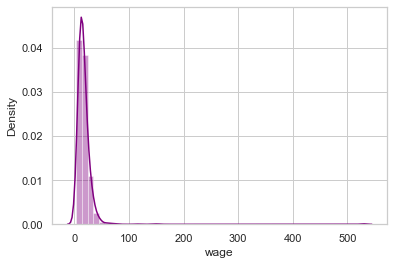

In [37]:
from seaborn import distplot

distplot(data.wage, color='purple')

Due to the problem of outlayers, the variable of the logarithm of wages is created. This corrects the asymmetry presented by the original data.

C:\Users\ANA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lwage', ylabel='Density'>

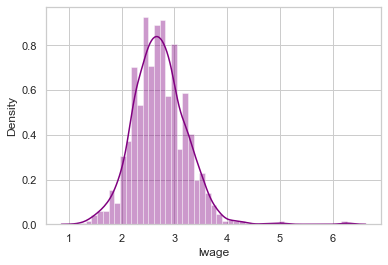

In [38]:
from seaborn import distplot

distplot(data.lwage,color='purple')

#### lwage and sex by grade

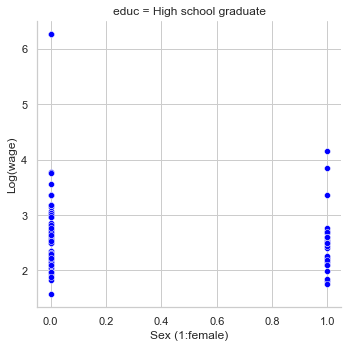

In [39]:
g = sns.relplot(data=data,  x="sex", y="lwage", col="educ", color='blue')
g.set_axis_labels("Sex (1:female)", "Log(wage)")

This graph shows that in the group of university graduates, there are some (few) who earn a higher salary than women. It can also be seen that there is less income variability among women than among men. On the other hand, in the group of some college we observe that there are unusually high observations in both the men's and women's groups, with a man being the one with the highest salary. It's interesting that among the unusual values there are people who have not yet finished university, but have higher incomes than those who did finish university.

Text(0, 0.5, ' ')

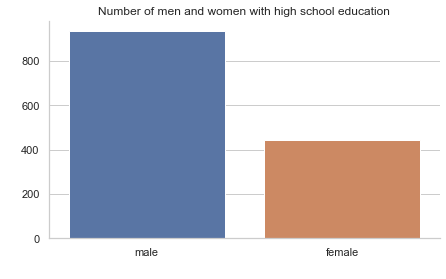

In [47]:
# The numbers of men and women in our sample.

sns.set( style="whitegrid" )


fig, ax = plt.subplots( figsize=(7,4) )

x = sns.countplot( x="sexo", data=data )

sns.despine()
plt.title('Number of men and women with high school education')
plt.xlabel(' ')
plt.ylabel(' ')

As we can see, there are more men with high school degrees than women in our sample of unmarried workers.

In [48]:
# How many women have some college compared to men?
# How many women have completed college compared to men?

data_scl = data[data['shs']==1]
data_clg = data[data['hsg']==1]

C:\Users\ANA\AppData\Local\Temp/ipykernel_1576/2816691971.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax = plt.pie(base2['lwage'], labels=labels,


ValueError: 'label' must be of length 'x'

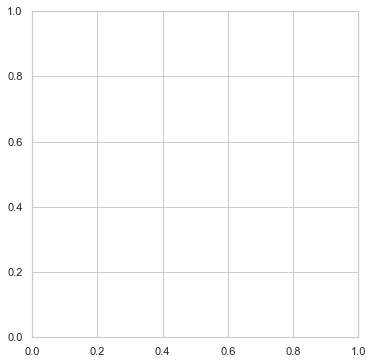

In [49]:
base2 = data_scl.groupby([ 'sexo' ]).count()

labels=['Female', 'Male']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['lwage'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, colors=['#c2c2f0','#66b3ff'])
  
# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribucion de some high school by sex')

# Adding notes

txt="Own elaboration - CPS(2015)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

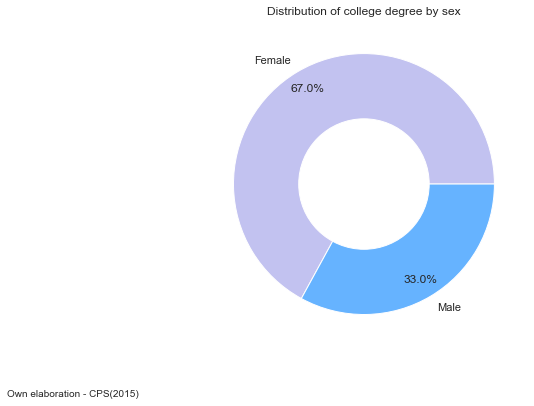

In [50]:
base2 = data_clg.groupby([ 'sex' ]).count()

labels=['Female', 'Male']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['lwage'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, colors=['#c2c2f0','#66b3ff'])
  
# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribution of college degree by sex')

# Adding notes

txt="Own elaboration - CPS(2015)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

In both subsamples we can observe the percentage is always lower than that of men (as happens in the total sample). However, in the college degree group, the representation of women increases.

#### lwage and place of residence

<AxesSubplot:xlabel='place', ylabel='Count'>

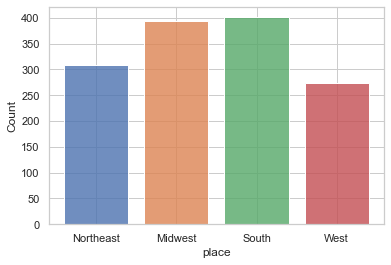

In [51]:
#f, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#sns.scatterplot(data=data, x="exp1", y="lwage", hue="sexo", ax=axs[0])
sns.histplot(data=data, x="place", hue="place", shrink=.8, alpha=.8, legend=False)
#f.tight_layout()

# The number of college-educated workers is higher in the midwest and south
# where there are fewer is in the west

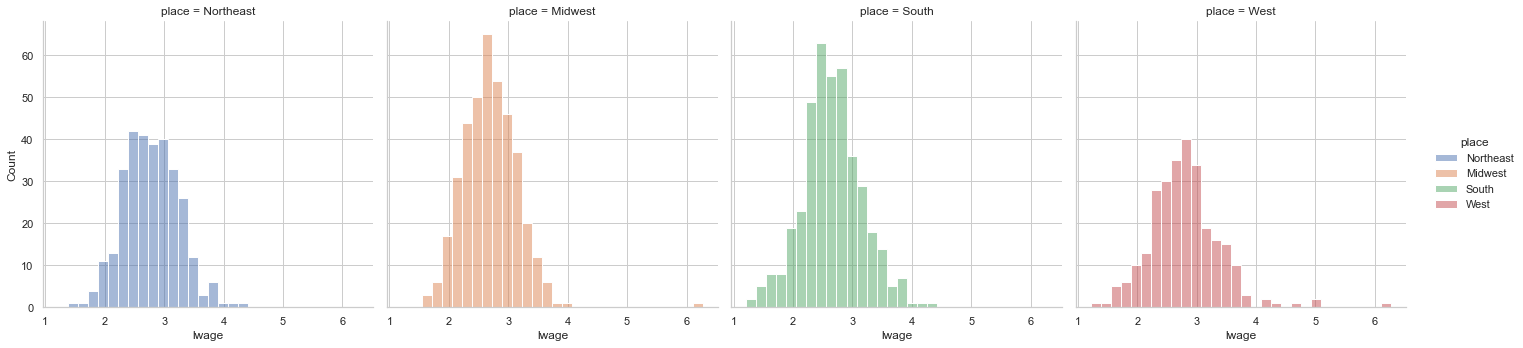

In [52]:
sns.displot(data=data, x="lwage", hue="place", col="place",bins=30)

The previous graph shows the distribution of the logarithm of salaries by place. We can see that the male observation with the highest income lives in the west.

#### Experience, Sex and lwage

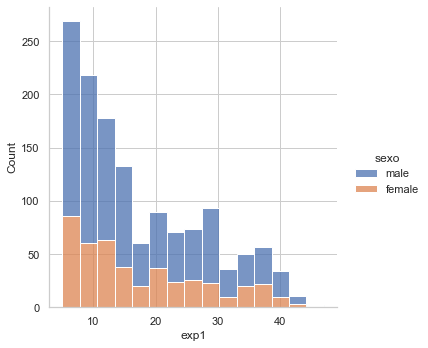

In [53]:
sns.displot(data=data, x="exp1", hue="sexo", multiple="stack")

There is a greater number of people with experience between 0 and 10 years. After 10 years, the population with a lot of experience is reduced. It can be seen that both women and men are roughly equally represented in each experience group, but it seems that generally men slightly outnumber women.

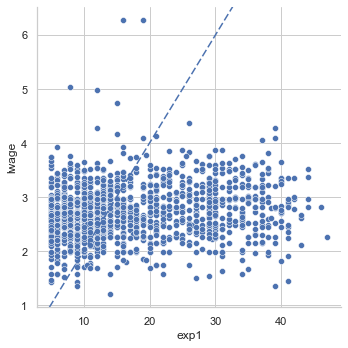

In [54]:
# This 
g = sns.relplot(data=data, x="exp1", y="lwage")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

This scatter plot does not tell us much about the relationship between experience and salary. We can see that the relationship is positive within this college-educated group, but that relationship is basically made up of unusual observations. It is interesting that for those between 10 and 30 years old, the relationship of more experience plus salary per hour is fulfilled, but after 30 years of experience, salaries are reduced.

In [56]:
#base = data_scl.groupby([ 'sexo' ]).count()
#base

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
sexo,,,,,,,,,,,,,,,,,,,,,
hombre,782,782,782,782,782,782,782,782,782,782,...,782,782,782,782,782,782,782,782,782,782
mujer,650,650,650,650,650,650,650,650,650,650,...,650,650,650,650,650,650,650,650,650,650


In [69]:
# plot pie

#base = data_scl.groupby('sexo').size()

#base.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f %%', colors= ['#c2c2f0','#66b3ff'])
#plt.title("Distribución de los some college por sexo")
#plt.ylabel("")
#plt.show()



In [ ]:
# hacer un scatter plot con años de experiencia e ingresos


### The causal analysis

We continue to start our (causal) analysis.

First, we compare the sample means given gender:

In [109]:
Z = data[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1" ] ]

data_female = data[data[ 'sex' ] == 1 ]
Z_female = data_female[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1" ] ]

data_male = data[ data[ 'sex' ] == 0 ]
Z_male = data_male[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1" ] ]


table = np.zeros( (9, 3) ) #9 filas, 3 columnas
table[:, 0] = Z.mean().values # el promedio de cada variable
table[:, 1] = Z_male.mean().values
table[:, 2] = Z_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women'])
table_pandas.index = ["Log Wage","Sex","Some College","Gollage Graduate", "Northeast","Midwest","South","West","Experience"]

table_pandas

,All,Men,Women
Log Wage,3.000022,3.038412,2.956904
Sex,0.470991,0.000000,1.000000
Some College,0.466754,0.481824,0.449827
Gollage Graduate,0.533246,0.518176,0.550173
Northeast,0.226532,0.219347,0.234602
Midwest,0.265971,0.261245,0.271280
South,0.285854,0.290819,0.280277
West,0.221643,0.228589,0.213841
Experience,12.700945,12.433148,13.001730


In [110]:
data_female["lwage"].mean() - data_male["lwage"].mean() # On average women earn 8,15% less than men

-0.08150855508736621

In this sample of workers who are or have finished university, women earn less on average than men. It is also interesting to note that in this sample the average experience is 12 years, and women have on average more years of experience than men, but still earn less.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

So, we will do the unconditional ols regression

In [112]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data ).fit() # el coef de sex debe ser igual al hallado por la diferencia de medias

nocontrol_est = nocontrol_model.summary2().tables[1]['Coef.']['sex']
nocontrol_se2 = nocontrol_model.summary2().tables[1]['Std.Err.']['sex'] 

# Robust standar error
HCV_coefs = nocontrol_model.cov_HC0 # We obtain the matrix of variances and covariances adjusted for heteroscedasticity
HCV_coefs
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1] # Para obtener la desviacion estandar saco la raiz cuadrada de la diagonal que contienen las varianzas
nocontrol_se


# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n')


df_noc=nocontrol_model.conf_int( alpha=0.05 ).loc[['sex']]
df_noc

The estimated gender coefficient is -0.08150855508735844 and the corresponding standard error is 0.019642433639058064
The estimated gender coefficient is -0.08150855508735844 and the corresponding robust standard error is 0.019579647767772348 



,0,1
sex,-0.120022,-0.042995


Finally,  we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

In [113]:
# OLS REGRESSION WITH CONTROLS

flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

control_model = smf.ols( formula = flex, data = data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']


HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
df_con=control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]
df_con

Coefficient for OLS with controls -0.0530623403577557 and the corresponding robust standard error is 0.16831263517846864


,0,1
sex,-0.09101,-0.015115


The estimated regression coefficient $\beta_1\approx-0.05306$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $8$\% for women decreases to about $5$\% after controlling for worker characteristics.  

Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

In [114]:
# PARTIALLING OUT USING OLS

# model for Y ~ W
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(scl+clg+occ2+ind2+mw+so+we)'
# model for D ~ W
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
r_Y = smf.ols( formula = flex_y , data = data ).fit().resid

# partialling-out the linear effect of W from D
r_D = smf.ols( formula = flex_d , data = data ).fit().resid

data_res = pd.DataFrame( np.vstack(( r_Y.values , r_D.values )).T , columns = [ 'r_Y', 'r_D' ] )

# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 'r_Y ~ r_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['r_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
df_par=partial_fit.conf_int( alpha=0.05 ).loc[['r_D']]
df_par

Coefficient for D via partialling-out -0.053062340357753826 and the corresponding robust standard error is 0.01835284965310159


,0,1
r_D,-0.089571,-0.016554


We have verified that this coefficient equals the estimated coefficient from the ols regression with controls.
Later we will prove the F-W-L theorem.

### Coefplots

In [160]:
param ={'nocontrol_model':-0.08150856,'control_model':-0.05306234,'partialling-out':-0.05306234}
pd_param=pd.DataFrame([[key, param[key]] for key in param.keys()], columns=['Type_model','Parameters'])
pd_param

,Type_model,Parameters
0,nocontrol_model,-0.081509
1,control_model,-0.053062
2,partialling-out,-0.053062


In [161]:
df_append=pd.concat([df_noc,df_con,df_par]).reset_index()
df_append

,index,0,1
0,sex,-0.120022,-0.042995
1,sex,-0.091010,-0.015115
2,r_D,-0.089571,-0.016554


In [162]:
err_series = pd_param['Parameters'][:]-df_append[0]
err_series.values


array([0.03851366, 0.03794774, 0.03650836])

In [163]:
r = pd_param['Parameters']
r
pd_param['Type_model'].values

array(['nocontrol_model', 'control_model', 'partialling-out'],
      dtype=object)

In [164]:
coef_df = pd.DataFrame({'coef': pd_param['Parameters'].values,
                        'err': err_series.values,
                        'varname': pd_param['Type_model'].values
                       })
coef_df


,coef,err,varname
0,-0.081509,0.038514,nocontrol_model
1,-0.053062,0.037948,control_model
2,-0.053062,0.036508,partialling-out


C:\Users\Andrea\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


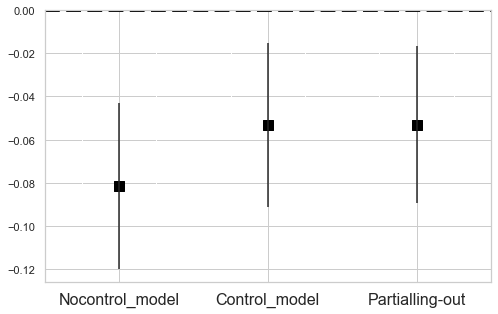

In [165]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Nocontrol_model','Control_model','Partialling-out'], 
                       rotation=0, fontsize=16)


### Replication the figure of the paper:

In [214]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

control_model = smf.ols( formula = flex, data = total_data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']


HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
df_con=control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]
df_con

Coefficient for OLS with controls -0.06955320329684986 and the corresponding robust standard error is 0.13163359131266178


,0,1
sex,-0.099387,-0.039719


In [216]:
base_predict = control_model.fit().predict()
base_predict.tolist()
total_data['lwage_hat'] = base_predict
print(total_data.shape)
total_data.head()

(5150, 22)


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,lwage_hat
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18,2.823740
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9,3.507794
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4,2.887935
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12,3.681236
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22,3.243041


In [247]:
data_scl = total_data[total_data['scl'] == 1]
scl = data_scl[['lwage','exp1','lwage_hat']].groupby(['exp1']).mean().reset_index()
scl['promed'] = 0
scl['promed_fit'] = 0

print(scl.shape)
scl.head()

(80, 5)


,exp1,lwage,lwage_hat,promed,promed_fit
0,3.0,2.693883,2.709861,0,0
1,3.5,2.729320,2.668572,0,0
2,4.0,2.696418,2.686658,0,0
3,4.5,2.611629,2.653173,0,0
4,5.0,2.727195,2.748470,0,0


In [248]:
for i in range(0,80):
    a = data_scl[data_scl['exp1'] <= scl['exp1'][i]]
    scl.loc[i,'promed'] = a['lwage'].mean()
    scl.loc[i,'promed_fit'] = a['lwage_hat'].mean()

scl.head()



,exp1,lwage,lwage_hat,promed,promed_fit
0,3.0,2.693883,2.709861,2.693883,2.709861
1,3.5,2.729320,2.668572,2.714895,2.685380
2,4.0,2.696418,2.686658,2.709306,2.685766
3,4.5,2.611629,2.653173,2.680130,2.676031
4,5.0,2.727195,2.748470,2.688087,2.688278


In [249]:
data_clg = data[data['clg'] == 1]

clg = data_clg[['lwage','exp1','lwage_hat']].groupby(['exp1']).mean().reset_index()
clg['promed'] = 0
clg['promed_fit'] = 0
clg.head()

,exp1,lwage,lwage_hat,promed,promed_fit
0,1.0,3.031143,3.028894,0,0
1,2.0,3.019492,3.013793,0,0
2,3.0,3.061553,3.064468,0,0
3,4.0,3.070771,3.077735,0,0
4,5.0,3.030900,3.077136,0,0


In [250]:
for i in range(0,40):
    a = data_clg[data_clg['exp1'] <= clg['exp1'][i]]
    clg.loc[i,'promed'] = a['lwage'].mean()
    clg.loc[i,'promed_fit'] = a['lwage_hat'].mean()

clg.head()


,exp1,lwage,lwage_hat,promed,promed_fit
0,1.0,3.031143,3.028894,3.031143,3.028894
1,2.0,3.019492,3.013793,3.025765,3.021924
2,3.0,3.061553,3.064468,3.036540,3.034733
3,4.0,3.070771,3.077735,3.043327,3.043259
4,5.0,3.030900,3.077136,3.041500,3.048241


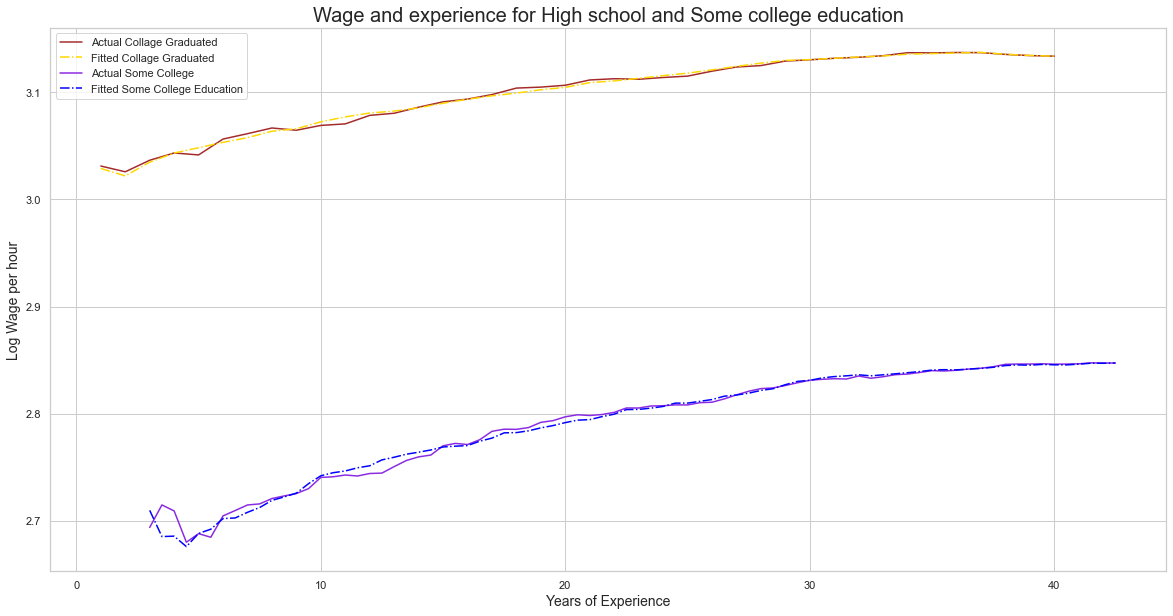

In [274]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 15})

x = clg["exp1"]
y = clg["promed"]
x_1 = scl['exp1']
y_1 = scl['promed']
x_2 = clg["exp1"]
y_2 = clg['promed_fit']
x_3 = scl['exp1']
y_3 = scl['promed_fit']

plt.plot(x, y, label = "Actual Collage Graduated ", linestyle='-',color='brown')   
plt.plot(x_2, y_2, label = "Fitted Collage Graduated", linestyle='dashdot', color='gold')
plt.plot(x_1, y_1, label = "Actual Some College", linestyle='-', color='#8A2BE2')
plt.plot(x_3, y_3, label = "Fitted Some College Education", linestyle='dashdot', color='#0000FF')

plt.xticks()
plt.legend()
plt.title("Wage and experience for High school and Some college education", size=20)
plt.xlabel("Years of Experience", size = 14)
plt.ylabel("Log Wage per hour", size = 14)
plt.show()

### Proof of the Frisch - Waugh - Lovell Theorem



For the proof of the theorem, we use the following:

1. The Partialling-out operation

    Be the following equation:
    $V$ = $\beta$$W$ + e
        
    $\tilde{V}$ =  $V$ - $\alpha_{YW}$$W$
    
    $\alpha_{YW}$ is the $\hat{\beta}$ (estimated parameter of the regression of V with W)
    
    We're creating a "residual" V by subtracting the part of V
    that is linearly predicted
    

2. This property tells us that from a linear combination of the sum of two vectors it follows that there is a linear       combination of the residualized vectors.

 $Y$ = $V$ + $W$  $\longrightarrow$  $\tilde{Y}$ = $\tilde{V}$ + $\tilde{W}$ 
    
    

Then let be the following regression:

\begin{align} 
Y= T \beta_1 + X \beta_2 + e   
\end{align}

where,

$T$: treatment variable

$\beta_1$: parameter that captures the causal effect

$X$: other regressors

$e$: error

Since we are interested in knowing only the value of $\beta_1$, we partialling-out to both sides of our regression equation:

\begin{align} 
\tilde{Y}= \tilde{T}\beta_1 +  \tilde{X}\beta_2 + \tilde{e}   
\end{align}

- Since the regression is a linear combination, we can obtain a linear equation of the errors estimated by the property defined at the beginning.

- Each argument of the equation [2] is the estimated error of the regression of that variable with respect to $X$ 

 $\tilde{Y}$ =  $Y$ - $\alpha_{YX}$$X$
 
 $\tilde{T}$ =  $T$ - $\alpha_{YX}$$X$

 $\tilde{X}$ =  $X$ - $\alpha_{XX}$$X$

 $\tilde{e}$ =  $e$ - $\alpha_{eX}$$X$
 

- Some of these estimated error will be deleted because:

 $\alpha_{XX}$ = $I$. So, $\tilde{X}$ = 0
 
 By definition: 
 $E(e | X)$ = 0, $\alpha_{eX}$= 0, and $\tilde{e}$=$e$
 

- So the  equation [2] reduces to the equation [3]:

\begin{align} 
\tilde{Y}= \tilde{T}\beta_1 + {e}   
\end{align}

Finally we come to what F-W-L proves in their theorem: we can reduce the  equation [1] containing many regressors on $X$ to a simple residual regression (which is defined by partially removing the linear effect of $X$ from $Y$ and $T$) that only has the parameter that we are interested in estimating.

The estimated parameter $\beta_1$ of the  equation [1] will be equal to the parameter $\beta_1$ that will be estimated in the regression [3].